In [1]:
import watermark
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
sns.set_theme(style="whitegrid")

In [6]:
file_name = './dataset/tabela_frequencia.csv'

In [7]:
df = pd.read_csv(file_name, sep=';', index_col=0)
df.head()

,País de Origem
Indivíduo,
1,Brasil
2,Inglaterra
3,Japão
4,EUA
5,Brasil


In [8]:
# Frequência absoluta
tabela_frequencia = df['País de Origem'].value_counts().reset_index()
tabela_frequencia.columns = ['País de Origem', 'Frequência Absoluta']

# Frequência relativa
tabela_frequencia['Frequência Relativa'] = tabela_frequencia['Frequência Absoluta'] / df.shape[0]

# Frequência acumulada
tabela_frequencia['Frequência Acumulada'] = tabela_frequencia['Frequência Absoluta'].cumsum()

# Frequência relativa acumulada
tabela_frequencia['Frequência Relativa Acumulada'] = tabela_frequencia['Frequência Relativa'].cumsum()

# Ordenar por país de origem
#tabela_frequencia.sort_values(by='País de Origem', ascending=False, inplace=True)

# Adicionar linha de soma
soma = pd.DataFrame({
    'País de Origem': ['Total'],
    'Frequência Absoluta': [tabela_frequencia['Frequência Absoluta'].sum()],
    'Frequência Relativa': [tabela_frequencia['Frequência Relativa'].sum()],
    'Frequência Acumulada': [tabela_frequencia['Frequência Acumulada'].iloc[-1]],
    'Frequência Relativa Acumulada': [tabela_frequencia['Frequência Relativa Acumulada'].iloc[-1]]
})
tabela_frequencia = pd.concat([tabela_frequencia, soma])

tabela_frequencia

,País de Origem,Frequência Absoluta,Frequência Relativa,Frequência Acumulada,Frequência Relativa Acumulada
0,Brasil,59,0.196667,59,0.196667
1,EUA,35,0.116667,94,0.313333
2,Índia,19,0.063333,113,0.376667
3,China,18,0.060000,131,0.436667
4,Uruguai,17,0.056667,148,0.493333
5,Japão,16,0.053333,164,0.546667
6,Austrália,15,0.050000,179,0.596667
7,África do Sul,14,0.046667,193,0.643333
8,Rússia,14,0.046667,207,0.690000
9,Inglaterra,12,0.040000,219,0.730000


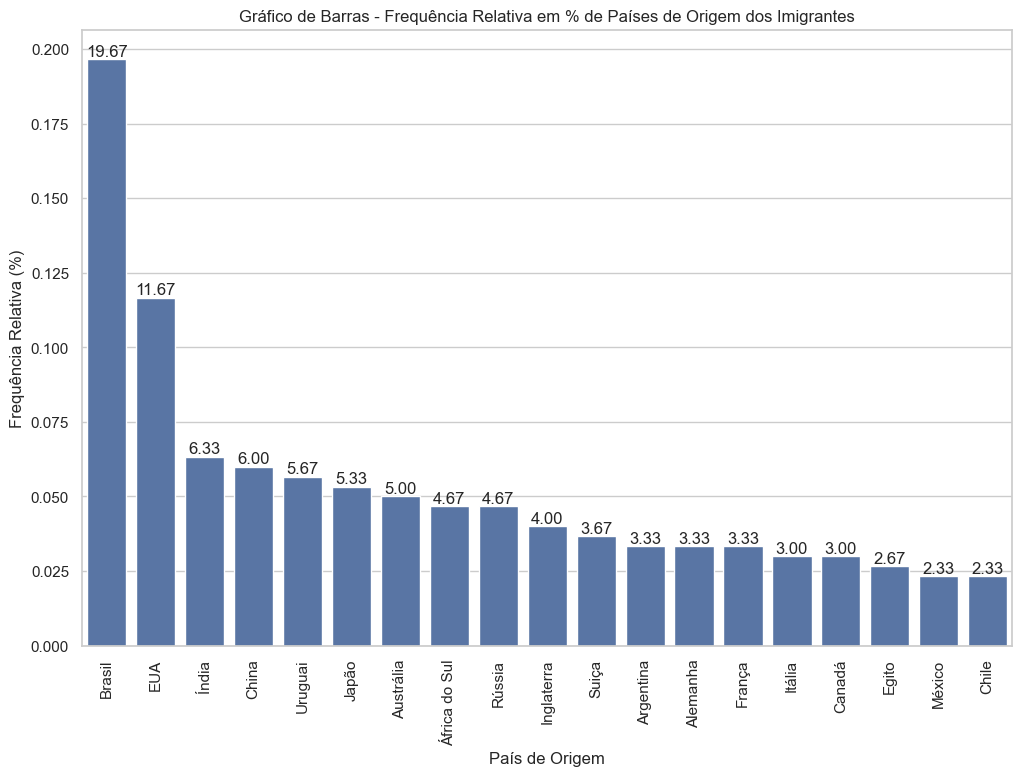

In [9]:
# Remover a linha com o valor "Total"
tabela_frequencia_sem_total = tabela_frequencia[tabela_frequencia['País de Origem'] != 'Total']

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=tabela_frequencia_sem_total, x='País de Origem', y='Frequência Relativa')

for patch in ax.patches:
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    ax.annotate(f'{y * 100:.2f}', (x, y), ha='center', va='bottom')

# Configurar o título e os rótulos dos eixos
plt.title('Gráfico de Barras - Frequência Relativa em % de Países de Origem dos Imigrantes')
plt.xlabel('País de Origem')
plt.xticks(rotation=90)
plt.ylabel('Frequência Relativa (%)')

# Exibir o gráfico
plt.show()
